<a href="https://colab.research.google.com/github/hyeonji826/Linear-Algebra/blob/main/3_Multiplication_and_Inverse_Matrices_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 행렬 곱셈 4가지 정리
- 넘파이(numpy)를 활용하여 각 곱셈 방식 구현
    - 행 - 열 곱
    - 열 - 행 곱
    - 선형 조합
    - 벡터 내적
- 행렬 곱셈 과정 시각화
    - matplotlib으로 행렬 요소 강조


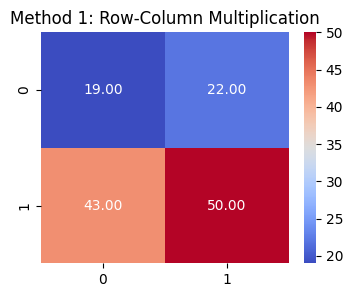

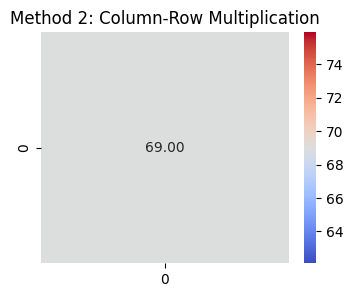

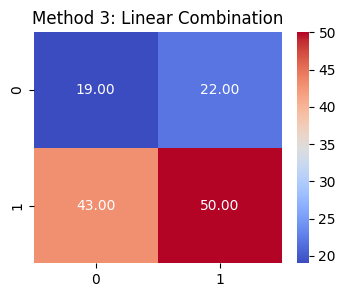

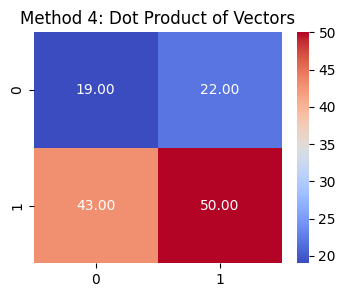

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation

# 행렬 곱셈 4가지 방법
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 방법 1: 행-열 곱
C1 = A @ B
# 방법 2: 열-행 곱 (각 열을 벡터로 보고 선형 결합)
C2 = np.array([A[:, i] @ B[i, :] for i in range(A.shape[1])]).sum(keepdims=True)
C2 = C2.reshape(1,1)
# 방법 3: 선형 조합 방식
C3 = sum(A[:, i].reshape(-1, 1) * B[i, :] for i in range(A.shape[1]))
# 방법 4: 벡터 내적의 조합
C4 = np.array([[np.dot(A[i, :], B[:, j]) for j in range(B.shape[1])] for i in range(A.shape[0])])

# 행렬 시각화 함수
def plot_matrix(mat, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(mat.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# 시각화 실행
plot_matrix(C1, "Method 1: Row-Column Multiplication")
plot_matrix(C2, "Method 2: Column-Row Multiplication")
plot_matrix(C3, "Method 3: Linear Combination")
plot_matrix(C4, "Method 4: Dot Product of Vectors")

## 2. 역행렬 구하는 과정
- 가우스 - 조던 소거법 직접 구현
- **numpy.linalg.inv()** 활용하여 검증
- 과정별 행렬 변화를 애니메이션으로 표현
**matplotlib.animation**


### 3. 추가적인 시각화
- **seaborn.heatmap()**을 활용하여 행렬을 색상으로 표현
- matplotplib 애니메이션을 활용하여 행렬 연산 과정 표시

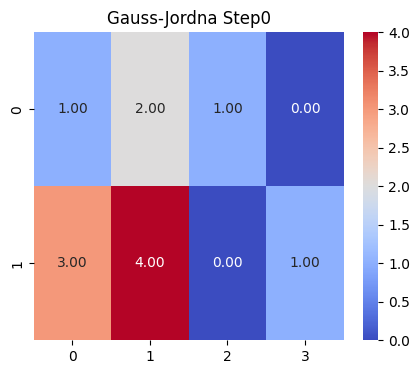

In [ ]:
# 가우스 - 조던 소거법을 활용한 역행렬 과정 시각화
def gauss_jordan_inverse(matrix):
    n = len(matrix)
    # np.hstack() -> 행 방향으로 배열
    # 즉, matrix와 np.eye(n)을 행 방향으로 이어 붙인다. np.eye(n) -> 단위행렬
    aug_matrix = np.hstack((matrix,np.eye(n)))
    steps = [aug_matrix.copy()]

# 1. 대각 원소를 1로 만든다.(해당 행을 나누기)
# 2. 다른 행들의 같은 열을 0으로 만든다.(행을 빼기)
# 3. 이 과정을 모든 행에 반복
# 4. 원래 행렬이 단위행렬로 변하면, 추가된 부분이 역행렬이 된다.
    for i in range(n):
        aug_matrix[i] /= aug_matrix[i,i]    # 1.대각 원소를 1로 만듦
        for j in range(n):
            if i != j :
                # 2. 현재 행을 사용해 다른 행의 해당 열을 0으로 만듦
                aug_matrix[j] -= aug_matrix[i]*aug_matrix[j,1]
        # 3. steps 리스트에 현재 상태의 행렬을 복사해서 저장
        steps.append(aug_matrix.copy())
    return aug_matrix[:,n:],steps

inv_matrix,steps = gauss_jordan_inverse(A)

# 역행렬 구하는 과정 애니메이션
def animate(i):
    plt.clf()
    sns.heatmap(steps[i],annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f'Gauss-Jordna Step{i}')

from IPython.display import HTML

fig = plt.figure(figsize=(5, 4))
ani = FuncAnimation(fig, animate, frames=len(steps), repeat=False)

# 애니메이션을 HTML로 변환하여 표시
HTML(ani.to_jshtml())
